Text(0, 0.5, 'f(x)')

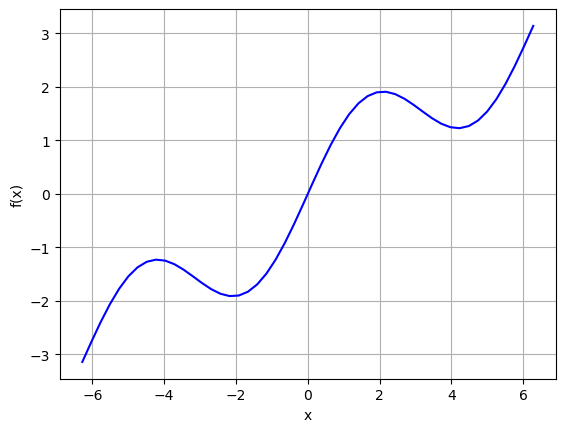

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def f(x):
    return np.sin(x)+0.5 * x

x = np.linspace(-2*np.pi, 2* np.pi, 50)
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

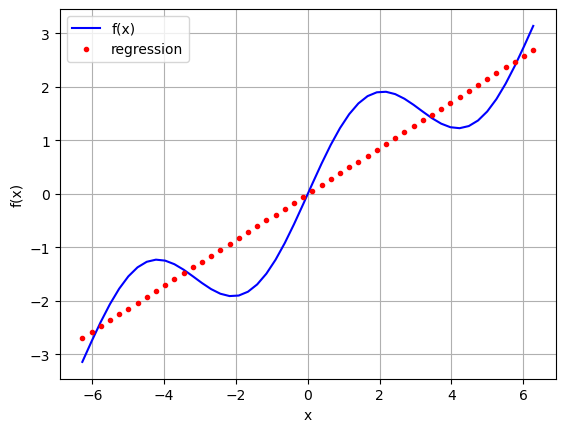

In [2]:
reg = np.polyfit(x,f(x), deg = 1)
ry = np.polyval(reg,x)

plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

Text(0, 0.5, 'f(x)')

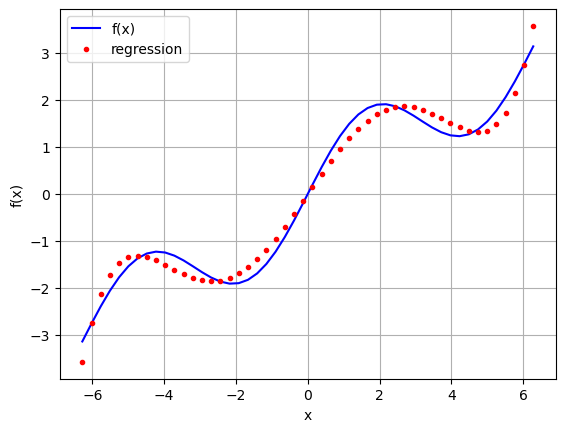

In [5]:
reg = np.polyfit(x,f(x), deg = 5)
ry_deg = np.polyval(reg,x)

plt.plot(x, f(x), 'b', label = 'f(x)')
plt.plot(x, ry_deg, 'r.', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [6]:
reg

array([ 1.37920761e-03, -1.43068505e-17, -6.82525072e-02, -7.42399117e-16,
        1.11425209e+00, -9.63421914e-15])

Text(0, 0.5, 'f(x)')

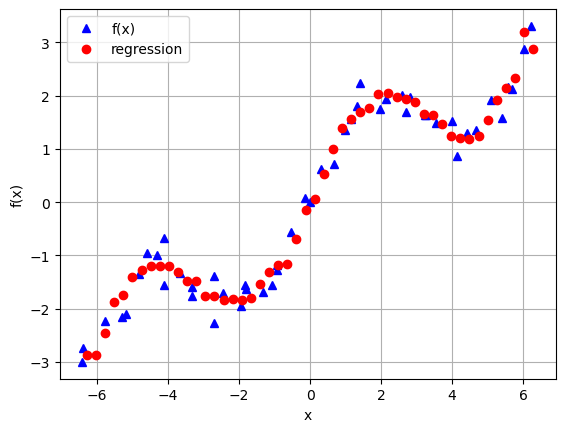

In [7]:
# creating noise in the data
del ry

xn = np.linspace(-2*np.pi, 2*np.pi, 50)
xn = xn+0.15*np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

plt.plot(xn, yn, 'b^', label = 'f(x)')
plt.plot(x, ry, 'ro', label = 'regression')
plt.legend(loc = 0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [8]:
# multi-dimensions
def fm(x,y):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y **2

x = np.linspace(0,10,20)
y = np.linspace(0,10,20)
X,Y = np.meshgrid(x,y)
Z = fm(X,Y)
x = X.flatten()
y = Y.flatten()


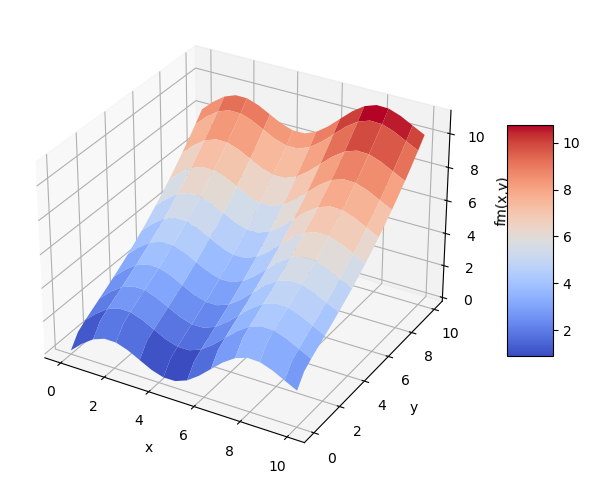

In [11]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X,Y,Z, rstride=2,cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('fm(x,y)')
fig.colorbar(surf,shrink=0.5, aspect = 5)

In [12]:
matrix = np.zeros((len(x), 6+1))
matrix[:,6] = np.sqrt(y)
matrix[:,5] = np.sin(x)
matrix[:,4] = y**2
matrix[:,3] = x**2
matrix[:,2] = y
matrix[:,1] = x
matrix[:,0] = 1

In [14]:
import statsmodels.api as sm
model = sm.OLS(fm(x,y), matrix).fit()

In [15]:
model.rsquared

1.0

start of convex optimization

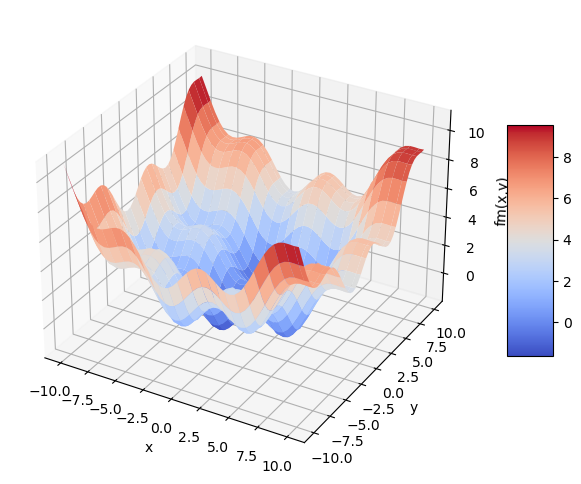

In [5]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.pyplot as plt
def fm(x,y):
    return(np.sin(x)+0.05 *x **2 + np.sin(y)+0.05 * y**2)

x = np.linspace(-10,10,50)
y = np.linspace(-10,10,50)
X,Y = np.meshgrid(x,y)
Z = fm(X,Y)

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(projection = '3d')
surf = ax.plot_surface(X,Y,Z, rstride=2,cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('fm(x,y)')
fig.colorbar(surf,shrink=0.5, aspect = 5)

In [ ]:
import scipy.optimize as spo

output = True

def fo(X):  # X will be a 1D array: [x, y]
    x, y = X
    z = np.sin(x) + 0.05 * x**2 + np.sin(y) + 0.05 * y**2
    if output:
        print('%8.4f %8.4f %8.4f' % (x, y, z))
    return z  # Return z, not Z

spo.brute(fo,((-10,10.1,5), (-10,10.1,5)), finish=None)

-10.0000 -10.0000  11.0880
-10.0000  -5.0000   7.7529
-10.0000   0.0000   5.5440
-10.0000   5.0000   5.8351
-10.0000  10.0000  10.0000
 -5.0000 -10.0000   7.7529
 -5.0000  -5.0000   4.4178
 -5.0000   0.0000   2.2089
 -5.0000   5.0000   2.5000
 -5.0000  10.0000   6.6649
  0.0000 -10.0000   5.5440
  0.0000  -5.0000   2.2089
  0.0000   0.0000   0.0000
  0.0000   5.0000   0.2911
  0.0000  10.0000   4.4560
  5.0000 -10.0000   5.8351
  5.0000  -5.0000   2.5000
  5.0000   0.0000   0.2911
  5.0000   5.0000   0.5822
  5.0000  10.0000   4.7471
 10.0000 -10.0000  10.0000
 10.0000  -5.0000   6.6649
 10.0000   0.0000   4.4560
 10.0000   5.0000   4.7471
 10.0000  10.0000   8.9120


array([0., 0.])

In [9]:
output = False
opt1 = spo.brute(fo,((-10,10.1,5), (-10,10.1,5)), finish=None)
opt1

array([0., 0.])